### Ett sista test - ersätta Base_Fare med median värde

Innan jag går vidare till nästa del i labben vill jag försäkra mig om att uträkningen av Base_fare, som medför ganska många droppade kolumner, verkligen är den bästa vägen att gå.   
Jag gör därför ett test, där jag jämför prediktionen med två olika df för att försäkra mig om att jag väljer rätt data för det fortsatta arbetet. 

In [10]:
import os
print("Nuvarande arbetskatalog:", os.getcwd())

Nuvarande arbetskatalog: c:\Users\susan\KodPython\LAB_taxi_pred\explorations


In [11]:
from taxipred.utils.constants import DATA_PATH 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../src/taxipred/data/taxi_trip_pricing.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [12]:
df_test = df.copy()

most_common = df["Time_of_Day"].mode()[0]
df_test["Time_of_Day"] = df_test["Time_of_Day"].fillna(most_common)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            1000 non-null   object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [13]:
distance_median = df["Trip_Distance_km"].median()

df_test["Trip_Distance_km"] = df_test["Trip_Distance_km"].fillna(distance_median)


In [14]:
df_test["Day_of_Week"] = df_test["Day_of_Week"].fillna("Unknown")

In [15]:
df_test["Weather"] = df_test["Weather"].fillna("Unknown")

In [16]:
passengers_median = df["Passenger_Count"].median()

df_test["Passenger_Count"] = df_test["Passenger_Count"].fillna(passengers_median)

In [17]:
df_test["Traffic_Conditions"] = df_test["Traffic_Conditions"].fillna("Unknown")

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   object 
 2   Day_of_Week            1000 non-null   object 
 3   Passenger_Count        1000 non-null   float64
 4   Traffic_Conditions     1000 non-null   object 
 5   Weather                1000 non-null   object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [19]:
df_test = df_test.fillna(df_test.median(numeric_only=True))

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   object 
 2   Day_of_Week            1000 non-null   object 
 3   Passenger_Count        1000 non-null   float64
 4   Traffic_Conditions     1000 non-null   object 
 5   Weather                1000 non-null   object 
 6   Base_Fare              1000 non-null   float64
 7   Per_Km_Rate            1000 non-null   float64
 8   Per_Minute_Rate        1000 non-null   float64
 9   Trip_Duration_Minutes  1000 non-null   float64
 10  Trip_Price             1000 non-null   float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [21]:
df.describe()


,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [22]:
df_test.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.008520,2.453000,3.503840,1.232650,0.292770,62.105210,56.541560
std,19.402661,1.079331,0.848115,0.418932,0.112664,31.339464,39.492129
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,13.107500,2.000000,2.770000,0.870000,0.197500,37.107500,34.578850
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,37.782500,3.000000,4.202500,1.580000,0.382500,87.775000,67.476650
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [23]:
X = df_test.drop(columns=["Trip_Price"])
y = df_test["Trip_Price"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 10), (300, 10), (700,), (300,))

In [25]:
# 1) Dela upp kolumner
num_cols = X_train.select_dtypes(include="number").columns
cat_cols = X_train.select_dtypes(exclude="number").columns
#

# Skala numeriska
scaler = StandardScaler()
scaled_X_train_num = scaler.fit_transform(X_train[num_cols])
scaled_X_test_num  = scaler.transform(X_test[num_cols])


# 3) One-hot-koda kategoriska
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[cat_cols])
X_test_cat  = encoder.transform(X_test[cat_cols])


# 4) Slå ihop till en enda feature-matris
import numpy as np
X_train_prepared = np.hstack([scaled_X_train_num, X_train_cat])
X_test_prepared  = np.hstack([scaled_X_test_num, X_test_cat])

In [26]:
model = LinearRegression()
model.fit(X_train_prepared, y_train)
y_pred_lr = model.predict(X_test_prepared)

In [27]:
model.coef_

array([35.3519384 , -0.07092247,  0.76497902, 10.23019269,  5.86495786,
        8.67086046,  0.94645311, -0.44142331,  1.34432154, -1.84935134,
        2.75012563, -1.69956207, -1.05056356, -1.45678417, -0.88502765,
       -0.79755089,  3.1393627 , -2.04113308, -1.6827739 ,  3.06859722,
        0.65530977])

In [28]:
test_sample_features = X_test_prepared[0].reshape(1, -1)
test_sample_target = y_test.values[0]

print("Test sample features: ", test_sample_features)
print("Test sample target: ", test_sample_target)

Test sample features:  [[-0.38947052 -0.42900831  1.24832811  1.18582429  1.27995192  1.42591238
   0.          0.          0.          1.          0.          1.
   0.          0.          1.          0.          0.          1.
   0.          0.          0.        ]]
Test sample target:  84.873


In [29]:
y_pred_lr = model.predict(X_test_prepared)
y_pred_lr.shape

(300,)

In [30]:
y_pred_lr[:5]

array([ 72.84243053,  92.78869847,  66.13138146,  71.95217221,
       118.50334822])

In [31]:
y_test[:5].values

array([ 84.873 ,  84.7232,  62.2353,  85.4652, 123.928 ])

In [32]:

print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("MAE: ", mean_absolute_error(y_test, y_pred_lr))
print("RMSE: ", root_mean_squared_error(y_test, y_pred_lr))
print("R2 :", r2_score(y_test, y_pred_lr))

MSE: 295.3141803888821
MAE:  10.650522557396652
RMSE:  17.184707748137065
R2 : 0.7733064670175755


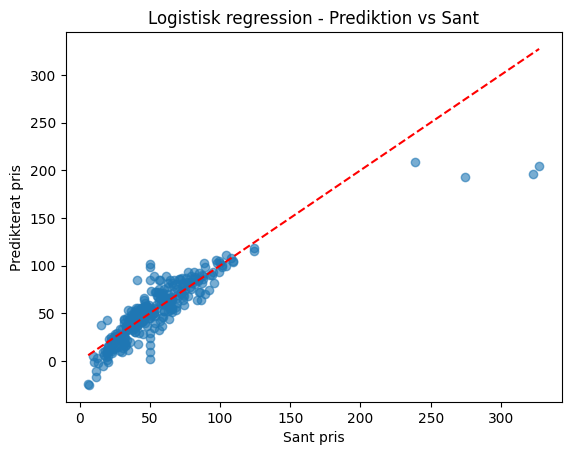

In [33]:
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Sant pris")
plt.ylabel("Predikterat pris")
plt.title("Logistisk regression - Prediktion vs Sant")
plt.show()

### Sammanfattning av att testa att fylla data med medianvärde jämfört med att droppa c:a 220 kolumner

Jag testade två olika strategier för att hantera null-värden:

1. Droppa null-värden (df_strict)  
   - Här tog jag bort alla rader som hade null-värden i `Trip_Price`, 
     `Trip_Duration_Minutes`, `Per_Km_Rate`, `Per_Minute_Rate`, eller `Trip_Distance_km`.
   - Det resulterade i att ca 220 rader försvann, och jag hade kvar 778 rader.

2. Imputera med medianvärden
   - Här ersatte jag alla null-värden i de numeriska kolumnerna med medianen 
     för respektive kolumn, så att inga rader försvann. 

##### Resultat av jämförelse (Linjär regression)
- Droppa nulls:
  - MSE: 226.8
  - MAE: 9.5
  - RMSE: 15.1
  - R²: 0.846

- Median-imputering:
  - MSE: 295.3
  - MAE: 10.7
  - RMSE: 17.2
  - R²: 0.773

##### Slutsats
Att fylla med medianvärden försämrade modellens prestanda.  

Jag väljer därför att arbeta vidare med **df_strict** (droppade nulls), 
eftersom den ger bättre prediktioner, trots att datamängden blir mindre.
